<a href="https://colab.research.google.com/github/luxc1101/Data-Structures-Algorithms/blob/main/Algorithm_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Joma Class Algorithm Questions

the class link:
https://www.jomaclass.com/products/data-structures-and-algorithms-in-progress/categories/3298212/posts/11010634


## Distribute Bonuses

In [ ]:
def getBonuses (performance):
  count = len(performance)
  bonus = [1]*count

  for i in range(1,count):
    if performance[i-1] < performance[i]:
      bonus[i] = bonus[i-1] + 1
  for i in range(count-2,-1,-1):
    if performance[i]> performance[i+1]:
      bonus[i] = max(bonus[i],bonus[i+1]+1)
    
  return bonus


In [ ]:
performance = [1,2,3,2,3,5,1]
performance = [4,3,2,2,3,1]
getBonuses(performance)

[3, 2, 1, 1, 2, 1]

##Swap Every Two Nodes in a Linked List
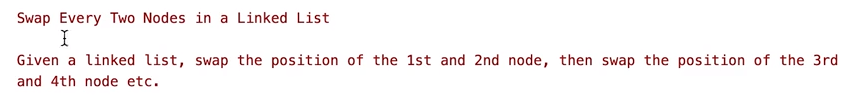

In [ ]:
class Node:
  def __init__(self, value, next = None):
    self.value = value
    self.next = next

  def __repr__(self):
    return f"{self.value}, ({self.next.__repr__()})"


In [ ]:
linked_l = Node(2, Node(1, Node(4, Node(3, Node(5)))))

In [ ]:
# plot linked list
head = linked_l
curr = head
while curr is not None:
  print('current value: {}'.format(curr.value))
  print('next: {}'.format(curr.next))
  curr = curr.next

current value: 2
next: 1, (4, (3, (5, (None))))
current value: 1
next: 4, (3, (5, (None)))
current value: 4
next: 3, (5, (None))
current value: 3
next: 5, (None)
current value: 5
next: None


In [ ]:
swap_every_two(linked_l)

1, (2, (3, (4, (5, (None)))))

In [ ]:
def swap_every_two(linked_l):
  head = linked_l
  curr = head

  while curr is not None and curr.next is not None:
    curr.value, curr.next.value = curr.next.value, curr.value
    curr = curr.next.next
  return linked_l

## H Index
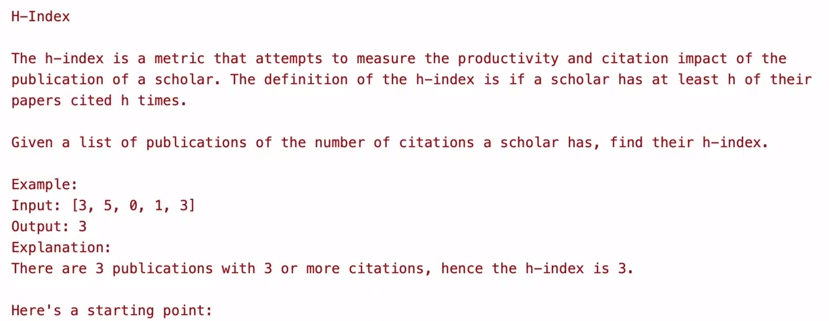

In [ ]:
def selection_sort(publications):
  n = len(publications)
  for i in range(n-1):
    max = i
    for j in range(i+1,n):
      if publications[max]<publications[j]:
        max = j

    temp = publications[i]
    publications[i]=publications[max]
    publications[max] = temp

  return publications

def h_index1(publications):
  publications = selection_sort(publications)
  print(publications)
  n = len(publications)
  cita = 1
  for i in range(n):
    if publications[i] < cita:
      return cita-1
    cita += 1 


In [ ]:
publications = [3,5,0,1,3]
h_index1(publications)

[5, 3, 3, 1, 0]


3

In [ ]:
def h_index2(publications):
  n = len(publications)
  citations = [0]*(n+1)
  
  for pub in publications:
    if pub<n:
      citations[pub] +=1
    else:
      citations[n] +=1
  print(citations)
  total = 0
  i = n
  while i>=0:
    total += citations[i]
    if total >= i:
      return total
    i-=1

In [ ]:
h_index2(publications)

[1, 1, 0, 2, 0, 1]


3

##Shortest Unique Prefix
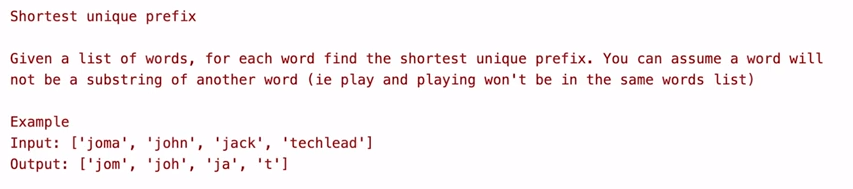

In [ ]:
class Node:
  def __init__(self):
    self.count = 0
    self.children = {}

In [ ]:
class Trie:
  def __init__(self):
    self.root = Node()
  
  def insert(self, word):
    curr_node = self.root
    for c in word:
      if c not in curr_node.children:
        curr_node.children[c] = Node()
      curr_node = curr_node.children[c]
      curr_node.count += 1

  def unique_prefix(self, word):
    curr_node = self.root
    prefix = ''

    for c in word:
      if curr_node.count == 1:
        return prefix
      else:
        curr_node = curr_node.children[c]
        prefix += c

    return prefix 

In [ ]:
words = ['jooma','john','jack', 'techlead']

In [ ]:
trie = Trie()
for word in words:
  trie.insert(word)

In [ ]:
for word in words:
  curr_node = trie.root
  for c in word:
    curr_node = curr_node.children[c]
    print('{},{},{}'.format(c,curr_node, curr_node.count))

j,<__main__.Node object at 0x7f408948ea90>,3
o,<__main__.Node object at 0x7f408948e410>,2
o,<__main__.Node object at 0x7f408948eb50>,1
m,<__main__.Node object at 0x7f408948e910>,1
a,<__main__.Node object at 0x7f408948e790>,1
j,<__main__.Node object at 0x7f408948ea90>,3
o,<__main__.Node object at 0x7f408948e410>,2
h,<__main__.Node object at 0x7f408948e110>,1
n,<__main__.Node object at 0x7f408948e050>,1
j,<__main__.Node object at 0x7f408948ea90>,3
a,<__main__.Node object at 0x7f408951fb90>,1
c,<__main__.Node object at 0x7f408951f590>,1
k,<__main__.Node object at 0x7f408951fc10>,1
t,<__main__.Node object at 0x7f408951f0d0>,1
e,<__main__.Node object at 0x7f408951f410>,1
c,<__main__.Node object at 0x7f408951f490>,1
h,<__main__.Node object at 0x7f408951f290>,1
l,<__main__.Node object at 0x7f408951f950>,1
e,<__main__.Node object at 0x7f408951f750>,1
a,<__main__.Node object at 0x7f408951f090>,1
d,<__main__.Node object at 0x7f40895b7e10>,1


In [ ]:
def shortest_unique_prefix(words):
  trie = Trie()

  for word in words:
    trie.insert(word)
  unique_pref = []
  for word in words:
    unique_pref.append(trie.unique_prefix(word))
  
  return unique_pref

In [ ]:
shortest_unique_prefix(words)

['joo', 'joh', 'ja', 't']

## Running Median



### Naive way


In [ ]:
def add_number(arr,n):
  arr.append(n)
  return arr

def print_median(arr):
  sorted_arr = sorted(arr)
  n = len(arr)

  if n % 2 == 0: # for even number
    return (sorted_arr[n//2] + sorted_arr[n//2-1])/2
  else: # for uneven number
    return sorted_arr[n//2]

def runging_median(arr):
    empty_arr = []
    if len(arr) == 0:
      print(-1)
      return
    elif len(arr) == 1:
      print(arr[0])
      return
    else:
      for n in arr:
        arr = add_number(empty_arr,n)
        median = print_median(arr)
        print(median) 


In [ ]:
arr = [2,1,4,7,2,0,7]
# arr = [1]
runging_median(arr)

2
1.5
2
3.0
2
2.0
2


### Naive way 2

In [ ]:
def binarySearch_posi(arr,l,r,n):
  while l<=r:
    mid = (l + r)//2
    if n>max(arr):
      return len(arr)
    elif n<min(arr):
      return 0
    elif arr[mid] <= n and arr[mid+1]>n:
      return mid+1
    elif arr[mid] < n:
      l = mid+1
    else:
      r = mid-1

def add_number(arr,n): 
  if len(arr) == 0:
    arr.append(n)
  else:
    posi = binarySearch_posi(arr,0,len(arr)-1,n)
    arr.insert(posi,n)
  return arr

def print_median(arr):
  n = len(arr)

  if n % 2 == 0: # for even number
    return (arr[n//2] + arr[n//2-1])/2
  else: # for uneven number
    return arr[n//2]

def runging_median(arr):
    sorted_arr = []
    if len(arr) == 0:
      print(-1)
      return
    elif len(arr) == 1:
      print(arr[0])
      return
    else:
      for n in arr:
        sorted_arr = add_number(sorted_arr,n)
        median = print_median(sorted_arr)
        print(median) 

In [ ]:
arr = [2,1,4,7,2,0,4]
runging_median(arr)

2
1.5
2
3.0
2
2.0
2


### Heap way

In [ ]:
import heapq

def get_median(min_heap, max_heap):
  if len(min_heap) > len(max_heap):
    return min_heap[0]
  elif len(min_heap) < len(max_heap):
    return -max_heap[0]
  else:
    min_root = min_heap[0]
    max_root = -max_heap[0]
    return (min_root + max_root)/2.0

def add(num, min_heap, max_heap):
  if len(min_heap) + len(max_heap) <=1:
    heapq.heappush(max_heap, -num)
    return
  median = get_median(min_heap, max_heap)
  if num > median:
    heapq.heappush(min_heap, num)
  else:
    heapq.heappush(max_heap, -num)

def rebalance(min_heap, max_heap):
  if len(min_heap) > len(max_heap) +1:
    root = heapq.heappop(min_heap)
    heapq.heappush(max_heap, -root)
  elif len(max_heap) > len(min_heap)+1 :
    root = -heapq.heappop(max_heap)
    heapq.heappush(min_heap, root)


def print_median(min_heap, max_heap):
  print(get_median(min_heap, max_heap))


def runing_median(stream):
  min_heap = []
  max_heap = []

  for num in stream:
    add(num, min_heap, max_heap)
    rebalance(min_heap, max_heap)
    print_median(min_heap, max_heap)

In [ ]:
runing_median([2,1,4,7,2,0,5])

2
1.5
2
3.0
2
2.0
2


## Longest Substring Without Repeating Letters

### Methode 1
two for loop  O(n^2)
set look up O(n)

together is O(n^3)

In [ ]:
def lengthOfLongestSubstring(s):
  n = len(s)
  ans = 0
  if n == 1:
    return 1
  else:
    for i in range(0,n-1): # 
      unique = set()
      unique.add(s[i])
      for j in range(i+1,n):
        if s[j] not in unique:
          unique.add(s[j])
        else:
          ans = max(ans,j-i)
          break
    return ans
  return ans

In [ ]:
lengthOfLongestSubstring("sdjsklhsd")

6

### Methode 2
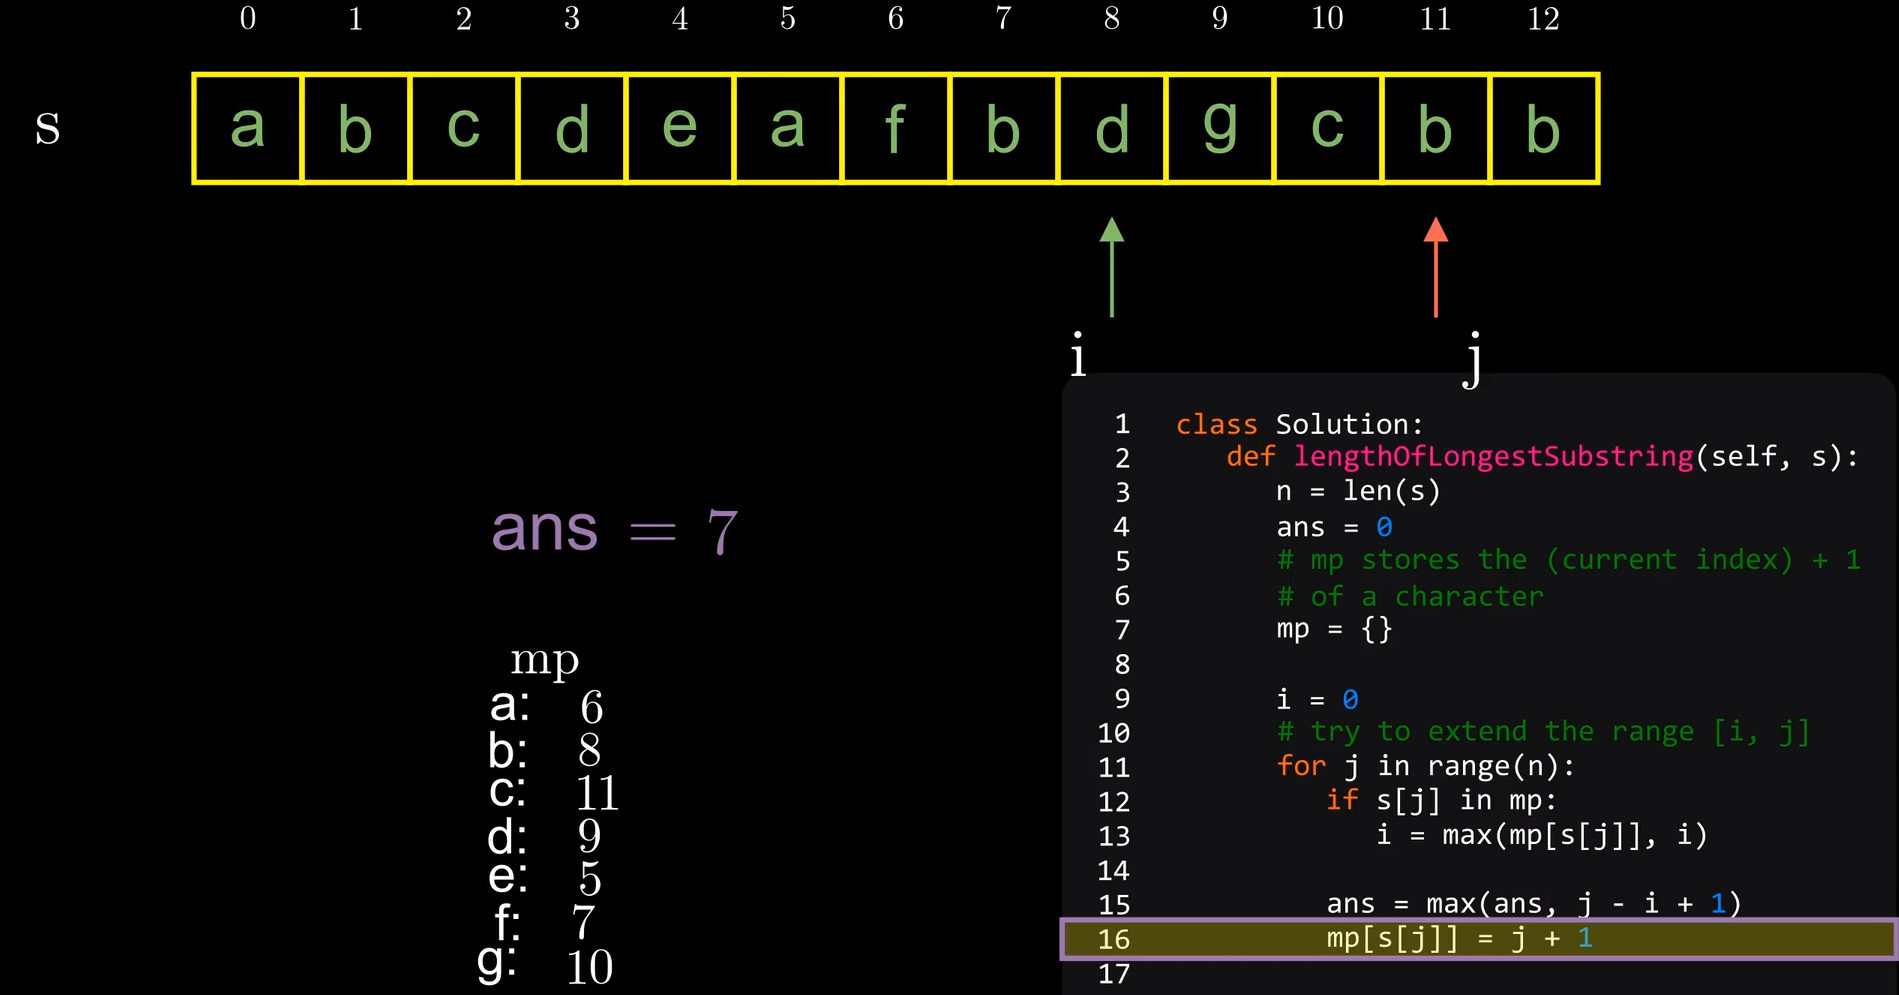

In [ ]:
def lengthOfLongestSubstring(s):
  n = len(s)
  ans = 0
  # mp stores the (current index) +1
  # of a charactors
  mp = {} # Hashmap
  i = 0
  for j in range(n):
    if s[j] in mp:
      i = max(mp[s[j]],i)

    ans = max(ans, j-i+1)
    mp[s[j]] = j+1

  return ans

In [ ]:
lengthOfLongestSubstring('abcabcbb')

3

In [ ]:
def lengthOfLongestSubstring(s):
  letters = {}
  tail = -1
  head = 0
  result = 0
  while head <len(s):
    if s[head] in letters:
      tail = max(tail,letters[s[head]])
    
    letters[s[head]] = head
    result = max(result, head - tail)
    head += 1
  return result
              


In [ ]:
lengthOfLongestSubstring('abcabcbb')

3

## Find Subtree
give 2 binary three t and s find if s has an equal subtree in t where the structure and the values are the same, Reture True if it exisit, otherwise return false

In [ ]:
class Node:
  def __init__(self,value, left = None , right = None):
    self.value = value
    self.left = left
    self.right = right
  
  def __repr__(self):
    return f"(value: {self.value} Left: {self.left} Right: {self.right})"

In [ ]:
t3 = Node(4, Node(3), Node(2))
t2 = Node(5, Node(4), Node(-1))
t = Node(1, t3, t2)
t3, t2, t

((value: 4 Left: (value: 3 Left: None Right: None) Right: (value: 2 Left: None Right: None)),
 (value: 5 Left: (value: 4 Left: None Right: None) Right: (value: -1 Left: None Right: None)),
 (value: 1 Left: (value: 4 Left: (value: 3 Left: None Right: None) Right: (value: 2 Left: None Right: None)) Right: (value: 5 Left: (value: 4 Left: None Right: None) Right: (value: -1 Left: None Right: None))))

In [ ]:
def find_subtree(s, t):
  # s: subtree, t: main tree
  def preorder_traversal(node):
    if node is None:
      return ''
    return str(node.value) + preorder_traversal(node.left) + preorder_traversal(node.right)

  return preorder_traversal(s), preorder_traversal(t), preorder_traversal(s) in preorder_traversal(t) 

In [ ]:
s = Node(4,Node(3), Node(2))
find_subtree(s,t)

('432', '143254-1', True)

## Number of 1 Bits
given an integer. find the number of 1 bits it has.

Here's an example and some starting code

23- 10111
11- 01011
5 - 00101
2 - 00010
1 - 00001
0 - 00000

In [ ]:
def one_bits(num):
  count = 0
  while num > 0:
    if num & 1 == 1:
      count += 1
    num = num >> 1 # >> shift in right every time one position
    # print(num)
  return count

In [ ]:
one_bits(23)

4

## Find Recurring Character


In [ ]:
def find_recurring_character(s):
  seen_so_for = set()

  for c in s:
    if c in seen_so_for:
      return c
    seen_so_for.add(c)
  return None


In [ ]:
find_recurring_character('qwertty')

't'

## Optimized List Sum

In [ ]:
class ListFastSum:
  def __init__(self, nums):
    self.nums = nums
    self.sum_up_to = []

    current_sum = 0
    for num in nums:
      current_sum += num
      self.sum_up_to.append(current_sum)

    self.sum_up_to.append(0)

  def sum(self, start_idx, end_idx):
    return self.sum_up_to[end_idx-1] - self.sum_up_to[start_idx-1]


In [ ]:
print(ListFastSum([1,2,3,4,5,6,7]).sum(2,5))
print(ListFastSum([1,2,3,4,5,6,7]).sum(0,5))

12
15


## Clambing Stairs

In [ ]:
# recursion methode
def climbStairs(n):
  if n == 0:
    return 1
  if n == 1:
    return 1
  else:
    return climbStairs(n-1) + climbStairs(n-2)

In [ ]:
climbStairs(6)

13

In [ ]:
def climbStairs2(n):
  if n == 0:
    return 1
  if n == 1:
    return 1
  first = 1
  second = 2
  for i in range(3, n+1):
    third = first + second
    first = second
    second = third
  return second 


In [ ]:
climbStairs2(2)

2

In [ ]:
memo = {0:1, 1:1}

In [ ]:
def climbStairs3(n):
  if n == 0:
    return memo[n]
  if n == 1:
    return memo[n]
  if n not in memo:
    memo[n] = climbStairs3(n-1) + climbStairs3(n-2)
  return memo[n]

In [ ]:
climbStairs3(6)

13

## Sorted colors

In [ ]:
# first, iterate the array counting number of 0,1,2, then overwrite array with total number of 0,1,2
# Input 
colors = [2,0,2,1,1,0,3,3,0]

def SortColor(colors):
  mp = {}
  output = []
  for c in colors:
    if c in mp:
      mp[c] += 1
    else: 
      mp[c] = 1

  for c in set(mp):
    for _ in range(mp[c]):
      output.append(c)

  return output


In [ ]:
SortColor(colors)

[0, 0, 0, 1, 1, 2, 2, 3, 3]

## Best Time to Buy and Sell Stock

In [ ]:
sale = [7,1,5,3,6,4]

def maxProfit(sale):
  if sale == []:
    return 0
  res = 0
  min_w = sale[0]
  for curr in sale:
    min_w = min(min_w, curr)
    res = max(res, curr-min_w)
  return res

In [ ]:
maxProfit(sale)

5

## The largest number

In [ ]:
from functools import cmp_to_key

In [ ]:
def largestNumber(nums):
  def compare(a,b):
    if str(a) + str(b) < str(b) + str(a):
      return 0
    else:
      return -1

  str_res =  [str(n) for n in sorted(nums, key=cmp_to_key(compare))]

  return int(''.join(str_res))

In [ ]:
largestNumber([17,7,2,45,72])

77245217

In [ ]:
def largestNumber2(nums): # only for a array with all numbers litter or eque than 10 
  for i in range(len(nums)-1):
    max = i
    for j in range(i+1, len(nums)):
      if str(nums[j]) > str(nums[max]):
        max = j
    nums[i], nums[max] = nums[max], nums[i]
  return ''.join([str(n) for n in  nums])

In [ ]:
largestNumber2([0,4,3,5,4,3,10,2,3,5])

'55443332100'

## Valid Parantheses

In [ ]:
def isValid(s):
  # fist of all build a empty stack (first in last out)
  stack = []
  for c in s:
    if c == '(':
      stack.append(c)
    if c == ')':
      if len(stack) == 0:
        return False
      if stack[-1] != '(':
        return False
      else:
        stack.pop()

    if c == '[':
      stack.append(c)
    if c == ']':
      if len(stack) == 0:
        return False
      if stack[-1] != '[':
        return False
      else:
        stack.pop()

    if c == '{':
      stack.append(c)
    if c == '}':
      if len(stack) == 0:
        return False
      if stack[-1] != '{':
        return False
      else:
        stack.pop()

  if len(stack) != 0:
    return False
  else:
    return True

In [ ]:
isValid('{[([)]}')

False

In [ ]:
isValid('{[([])]}')

True

## Fixed Point

In [ ]:
def helper(low, high, nums):
  if low == high:
    return None # no such a number, that the index eque to the value
  mid = (low + high)//2
  if nums[mid] == mid:
    return mid
  if nums[mid] < mid:
    return helper(mid+1, high, nums)
  return helper(low, mid, nums)

def find_fixed_point(nums):
  return helper(0, len(nums), nums) 

In [ ]:
find_fixed_point([-5,-2,-3,6])

In [ ]:
find_fixed_point([-5,-4,0,1,4,10,25])

4

## Minimum Size Subarray Sum
Input: s = 7, nums = [2,3,1,2,4,3]

output: 2

Explanation: the subarray [4,3] has the minimal length under the problem constraint.


### Naive way

In [ ]:
input = [2,3,1,2,4,3]

In [ ]:
def sub_arr_sum(arr):
  sub_sum = 0
  for i in range(len(arr)):
    sub_sum += arr[i]
  return sub_sum

def miSubArray(nums,s):
  res = float('inf')
  for i in range(len(nums)-1):
    for j in range(i+1, len(nums)+1):
      sum = sub_arr_sum(nums[i:j])
      if sum >= s:
        res = min(res, j-i)
  if res == float('inf'):
    return 0
  else:
    return res


In [ ]:
miSubArray(input,7)

2

### high level way

In [ ]:
def miSubArray2(nums,s):
  res = float('inf')
  sum = 0
  left = 0
  right = 0
  while right < len(nums):
    sum += nums[right]
    while sum >= s:
      # updating the result
      res = min(res, right-left+1)
      # increment left pointer
      sum -= nums[left]
      left += 1
    right += 1
  if res == float('inf'):
    return 0
  else:
    return res

In [ ]:
miSubArray2(input,7)

2

## String To Integer

In [ ]:
def convert_to_int(s):
  if len(s) == 0:
    return None
  result = 0
  is_negativ = False

  if s[0] == '-':
    is_negativ = True
    s = s[1:]
  ascii_zero = ord('0') # ascii(0) = 48, ascii(1) = 49,..., ascii(n) = n + 48
  for ch in s:
    if not ch.isdigit():
      return None
    result = result * 10 + (ord(ch) - ascii_zero)

  return -result if is_negativ else result 

In [ ]:
convert_to_int('-34782')

-34782

## Arithmetic Binary Tree

In [ ]:
class Node:
  def __init__(self, val, left = None, right = None):
    self.val = val
    self.left = left
    self.right = right

  def __repr__(self):
    return f"(value: {self.val} Left: {self.left} Right: {self.right})"
  
plus = '+'
times = '*'
minus = '-'
divide = '/'

In [ ]:
tree = Node(times)
tree.left = Node(plus)
tree.right = Node(plus)
tree.left.left = Node(3)
tree.left.right = Node(2)
tree.right.left = Node(4)
tree.right.right = Node(5)
tree

(value: * Left: (value: + Left: (value: 3 Left: None Right: None) Right: (value: 2 Left: None Right: None)) Right: (value: + Left: (value: 4 Left: None Right: None) Right: (value: 5 Left: None Right: None)))

In [ ]:
def solved(root):
  if root.val == plus:
    return solved(root.left) + solved(root.right)
  elif root.val == minus:
    return solved(root.left) - solved(root.right)
  elif root.val == times:
    return solved(root.left) * solved(root.right)
  elif root.val == divide:
    return solved(root.left) / solved(root.right)
  else:
    return root.val

In [ ]:
solved(tree)

45

## Inorder Successor

In [31]:
class Node:
  def __init__(self, value, left = None, right = None, parent = None):
    self.value = value
    self.left = left
    self.right = right
    self.parent = parent

  def __repr__(self):
    return f"(Value: {self.value}, Left: {self.left}, Right: {self.right})"

In [73]:
tree = Node(10)
tree.left = Node(5)
tree.left.parent = tree
tree.right = Node(15)
tree.right.parent = tree
tree.left.left = Node(3)
tree.left.left.parent = tree.left
tree.left.right = Node(8)
tree.left.right.parent = tree.left
tree.left.left.left = Node(1,parent=tree.left.left.value)
tree.left.left.right = Node(4,parent=tree.left.left.value)
tree.left.left.left.right = Node(2,parent=tree.left.left.left.value)
tree.left.right.left = Node(7, parent=tree.left.right.value)
tree.left.right.right = Node(9, parent=tree.left.right.value)

tree.right.left = Node(12)
tree.right.left.parent = tree.right
tree.right.right = Node(17)
tree.right.right.parent = tree.right
tree.right.left.left = Node(10.5, parent=tree.right.left.value)
tree.right.left.right = Node(13, parent=tree.right.left.value)
tree.right.left.left.right = Node(11, parent=tree.right.left.left.value)
tree.right.right.left = Node(16, parent=tree.right.right.value)
tree.right.right.right = Node(18, parent=tree.right.right.value)

tree

(Value: 10, Left: (Value: 5, Left: (Value: 3, Left: (Value: 1, Left: None, Right: (Value: 2, Left: None, Right: None)), Right: (Value: 4, Left: None, Right: None)), Right: (Value: 8, Left: (Value: 7, Left: None, Right: None), Right: (Value: 9, Left: None, Right: None))), Right: (Value: 15, Left: (Value: 12, Left: (Value: 10.5, Left: None, Right: (Value: 11, Left: None, Right: None)), Right: (Value: 13, Left: None, Right: None)), Right: (Value: 17, Left: (Value: 16, Left: None, Right: None), Right: (Value: 18, Left: None, Right: None))))

In [76]:
def inorder_successor(node):
  if node.right:
    curr = node.right
    while curr.left:
      curr = curr.left
      # print(curr.value)
    return curr

  parent = node.parent
  curr = node
  while parent and parent.left is not curr:
    curr = parent
    parent = parent.parent
    # print(parent.value)
  return parent

In [78]:
inorder_successor(tree.left.left).value

4

## Max. Subarray

In [89]:
input = [-2,1,-3,4,-1,2,1,-5,4]

In [90]:
def maxSubarray(nums):
  if len(nums) == 0:
    return 0
  res = nums[0]
  currMax = 0
  for n in nums:
    if currMax + n < 0:
      currMax = 0
      res = max(res, n)
    else:
      currMax += n
      res = max(currMax, res)

    print(res)
  return res

In [91]:
maxSubarray(input)

-2
1
1
4
4
5
6
6
6


6